# 02805 week 7 exercise
s202997 Nina Weng
## Exercise 1: Comparing word-counts of Marvel and DC heroes. [The longest exercise in the class 😱]. It consists of four steps. And it's great.

### Step one: TF List

The goal of this exercise is to create your own wordclouds, characterizing the two comic-book universes. Check out my awesome word-clouds below. I think it's pretty clear

In [6]:

# get the text from data_folder

import os
data_folder = './data/character wiki pages/marvel'

# the list we used for store the wiki page text
wikipages = []
txt_files = os.listdir(data_folder)
for f in txt_files:
    file_path = os.path.join(data_folder,f)
    with open(file_path,encoding='utf-8') as f:
        text = f.read()
    wikipages.append(text)
    
print('number or file in marvel network:{}'.format(len(wikipages)))
# print('average length of wikipage is:{}'.format())
print('the 3rd text:\n{}'.format(wikipages[3][0:2000]))

number or file in marvel network:1642
the 3rd text:
{{Infobox comics character
<!--Wikipedia:WikiProject Comics-->
| image   = Abomination (Emil Blonsky).jpg
| converted= y
| caption = Textless cover of ''[[Hulk (comic book)|Immortal Hulk]]'' #22 (Aug. 2019).<br>Art by [[Ryan Brown (comics)|Ryan Brown]]
| character_name = Abomination
| publisher = [[Marvel Comics]]
| debut   = ''[[Tales to Astonish]]'' #90 (April 1967)
| creators = [[Stan Lee]]<br>[[Gil Kane]]
| alter_ego = Emil Blonsky
| full_name =
| species = Human mutate
| homeworld =
| alliances =The [[KGB]]<br/>[[Advanced Idea Mechanics|A.I.M]]<br/>The Legion Accursed<br/>The [[Masters of Evil]]<br/>The [[Lethal Legion]]
| partners = The [[Leader (comics)|Leader]]<br/>Xeron the Star Slayer<br/>The [[Rhino (character)|Rhino]]<br/>The [[Galaxy Master]]<br/>[[MODOK]]
| aliases = Agent R-7<br/>The Ravager of Worlds
| supports =<!--optional-->
| powers  ={{Plainlist|
* Superhuman strength, speed, stamina and durability
* Regenerative 

In [8]:
# TEST
from nltk.tokenize import word_tokenize
text = wikipages[3]
word_tokenize(text[0:100])

['{',
 '{',
 'Infobox',
 'comics',
 'character',
 '<',
 '!',
 '--',
 'Wikipedia',
 ':',
 'WikiProject',
 'Comics',
 '--',
 '>',
 '|',
 'image',
 '=',
 'Abomination',
 '(',
 'Emil',
 'Blonsky',
 ')',
 '.jpg',
 '|',
 'converted=',
 'y',
 '|',
 'caption',
 '=',
 'Textless',
 'cover',
 'of',
 '``',
 '[',
 '[',
 'Hulk',
 '(',
 'comic',
 'book',
 ')',
 '|Immortal',
 'Hulk',
 ']',
 ']',
 "''",
 '#',
 '22',
 '(',
 'Aug.',
 '2019',
 ')',
 '.',
 '<',
 'br',
 '>',
 'Art',
 'by',
 '[',
 '[',
 'Ryan',
 'Brown',
 '(',
 'comics',
 ')',
 '|Ryan',
 'Brown',
 ']',
 ']',
 '|',
 'character_name',
 '=',
 'Abomination',
 '|',
 'publisher',
 '=',
 '[',
 '[',
 'Marvel',
 'Comics',
 ']',
 ']',
 '|',
 'debut',
 '=',
 '``',
 '[',
 '[',
 'Tales',
 'to',
 'Astonish',
 ']',
 ']',
 "''",
 '#',
 '90',
 '(',
 'April',
 '1967',
 ')',
 '|',
 'creators',
 '=',
 '[',
 '[',
 'Stan',
 'Lee',
 ']',
 ']',
 '<',
 'br',
 '>',
 '[',
 '[',
 'Gil',
 'Kane',
 ']',
 ']',
 '|',
 'alter_ego',
 '=',
 'Emil',
 'Blonsky',
 '|',
 'full_na

In [10]:
# 0*. clean the text (remove the useless part)
# (a). <ref> ... <ref>

# 1. Tokenize the pages into individual strings
# (into strings?? more like to list i guess)

from nltk.tokenize import word_tokenize
from tqdm import tqdm
tokenize = []
for text in tqdm(wikipages):
    tokenize.extend(word_tokenize(text))

100%|██████████████████████████████████████████████████████████████████████████████| 1642/1642 [01:00<00:00, 26.96it/s]


In [37]:
print('the first 200 "word"(fake!) of tokenize:\n{}'.format(tokenize[0:200]))

the first 200 "word"(fake!) of tokenize:
["'", "''", '3-D', 'Man', "''", "'", 'is', 'the', 'name', 'of', 'two', 'fictional', '[', '[', 'superhero', ']', ']', 'es', 'appearing', 'in', '[', '[', 'American', 'comic', 'book', ']', ']', 's', 'published', 'by', '[', '[', 'Marvel', 'Comics', ']', ']', '.', 'The', 'first', 'superhero', 'to', 'use', 'the', 'name', '3-D', 'Man', 'is', 'a', 'composite', 'of', 'two', 'brothers', ',', 'Charles', 'and', 'Hal', 'Chandler', ',', 'and', 'the', 'second', 'is', '[', '[', 'Delroy', 'Garrett', ']', ']', '.', 'The', 'first', '3-D', 'Man', 'appeared', 'in', '``', '[', '[', 'Marvel', 'Premiere', ']', ']', "''", '#', '35', '(', 'Apr', '1977', ')', ',', 'created', 'by', '[', '[', 'Roy', 'Thomas', ']', ']', 'and', '[', '[', 'Johnny', 'Craig|John', 'Craig', ']', ']', '.', '<', 'ref', '>', '{', '{', 'cite', 'book', '|last1=DeFalco', '|first1=Tom', '|last2=Sanderson', '|first2=Peter', '|last3=Brevoort', '|first3=Tom', '|last4=Teitelbaum', '|first4=Michael', '|last5

In [47]:
# 2. Remove all punctuation from your list of tokens
import re
# pattern =  r'^[a-zA-Z0-9][a-zA-Z0-9\-]*[a-zA-Z0-9]$|[a-zA-Z0-9]'
pattern =  r'[a-zA-Z0-9\-]+'
tokenize_nopunc = []
for w in tokenize:   
    tokenize_nopunc.extend(re.findall(pattern,w)) # w.isalnum()  function could not extract '3-D'
    #  bigrams_without_stopw_alnum = [pair for pair in bigrams_without_stopw if pair[0].isalnum() and pair[1].isalnum()]
print('the first 100 "word"(fake?) of tokenize:\n{}'.format(tokenize_nopunc[0:100]))

the first 100 "word"(fake?) of tokenize:
['3-D', 'Man', 'is', 'the', 'name', 'of', 'two', 'fictional', 'superhero', 'es', 'appearing', 'in', 'American', 'comic', 'book', 's', 'published', 'by', 'Marvel', 'Comics', 'The', 'first', 'superhero', 'to', 'use', 'the', 'name', '3-D', 'Man', 'is', 'a', 'composite', 'of', 'two', 'brothers', 'Charles', 'and', 'Hal', 'Chandler', 'and', 'the', 'second', 'is', 'Delroy', 'Garrett', 'The', 'first', '3-D', 'Man', 'appeared', 'in', 'Marvel', 'Premiere', '35', 'Apr', '1977', 'created', 'by', 'Roy', 'Thomas', 'and', 'Johnny', 'Craig', 'John', 'Craig', 'ref', 'cite', 'book', 'last1', 'DeFalco', 'first1', 'Tom', 'last2', 'Sanderson', 'first2', 'Peter', 'last3', 'Brevoort', 'first3', 'Tom', 'last4', 'Teitelbaum', 'first4', 'Michael', 'last5', 'Wallace', 'first5', 'Daniel', 'last6', 'Darling', 'first6', 'Andrew', 'last7', 'Forbeck', 'first7', 'Matt', 'last8', 'Cowsill', 'first8', 'Alan']


In [48]:
# 3. Set everything to lower case
tokenize_nopunc_lower = [w.lower() for w in tokenize_nopunc]
print('the first 100 "word"(fake?) of tokenize:\n{}'.format(tokenize_nopunc_lower[0:100]))

the first 100 "word"(fake?) of tokenize:
['3-d', 'man', 'is', 'the', 'name', 'of', 'two', 'fictional', 'superhero', 'es', 'appearing', 'in', 'american', 'comic', 'book', 's', 'published', 'by', 'marvel', 'comics', 'the', 'first', 'superhero', 'to', 'use', 'the', 'name', '3-d', 'man', 'is', 'a', 'composite', 'of', 'two', 'brothers', 'charles', 'and', 'hal', 'chandler', 'and', 'the', 'second', 'is', 'delroy', 'garrett', 'the', 'first', '3-d', 'man', 'appeared', 'in', 'marvel', 'premiere', '35', 'apr', '1977', 'created', 'by', 'roy', 'thomas', 'and', 'johnny', 'craig', 'john', 'craig', 'ref', 'cite', 'book', 'last1', 'defalco', 'first1', 'tom', 'last2', 'sanderson', 'first2', 'peter', 'last3', 'brevoort', 'first3', 'tom', 'last4', 'teitelbaum', 'first4', 'michael', 'last5', 'wallace', 'first5', 'daniel', 'last6', 'darling', 'first6', 'andrew', 'last7', 'forbeck', 'first7', 'matt', 'last8', 'cowsill', 'first8', 'alan']


In [50]:
# 4. (Optional) Lemmatize your words
import nltk
porter = nltk.PorterStemmer()
tokenize_nopunc_lower_lemmatize = [porter.stem(w) for w in tokenize_nopunc_lower]
print('the first 100 "word"(fake?) of tokenize:\n{}'.format(tokenize_nopunc_lower_lemmatize[0:100]))

the first 100 "word"(fake?) of tokenize:
['3-d', 'man', 'is', 'the', 'name', 'of', 'two', 'fiction', 'superhero', 'es', 'appear', 'in', 'american', 'comic', 'book', 's', 'publish', 'by', 'marvel', 'comic', 'the', 'first', 'superhero', 'to', 'use', 'the', 'name', '3-d', 'man', 'is', 'a', 'composit', 'of', 'two', 'brother', 'charl', 'and', 'hal', 'chandler', 'and', 'the', 'second', 'is', 'delroy', 'garrett', 'the', 'first', '3-d', 'man', 'appear', 'in', 'marvel', 'premier', '35', 'apr', '1977', 'creat', 'by', 'roy', 'thoma', 'and', 'johnni', 'craig', 'john', 'craig', 'ref', 'cite', 'book', 'last1', 'defalco', 'first1', 'tom', 'last2', 'sanderson', 'first2', 'peter', 'last3', 'brevoort', 'first3', 'tom', 'last4', 'teitelbaum', 'first4', 'michael', 'last5', 'wallac', 'first5', 'daniel', 'last6', 'darl', 'first6', 'andrew', 'last7', 'forbeck', 'first7', 'matt', 'last8', 'cowsil', 'first8', 'alan']


In [64]:
#  5. Create your TF list for each universe.
marvel_tf_list = nltk.FreqDist(tokenize_nopunc_lower_lemmatize)

In [65]:
marvel_tf_list

FreqDist({'the': 225920, 'and': 96942, 'of': 95029, 'ref': 92942, 'to': 90457, 'comic': 74953, 'a': 70806, 'in': 68884, 'marvel': 52240, 's': 42317, ...})

In [60]:
# define a function
import os
def tf_list_generate(data_folder):
    # the list we used for store the wiki page text
    wikipages = []
    txt_files = os.listdir(data_folder)
    for f in txt_files:
        file_path = os.path.join(data_folder,f)
        with open(file_path,encoding='utf-8') as f:
            text = f.read()
        wikipages.append(text)
        
    # 1. Tokenize the pages into individual strings
    # (into strings?? more like to list i guess)

    from nltk.tokenize import word_tokenize
    from tqdm import tqdm
    tokenize = []
    for text in tqdm(wikipages):
        tokenize.extend(word_tokenize(text))
    
    # 2. Remove all punctuation from your list of tokens
    import re
    # pattern =  r'^[a-zA-Z0-9][a-zA-Z0-9\-]*[a-zA-Z0-9]$|[a-zA-Z0-9]'
    pattern =  r'[a-zA-Z0-9\-]+'
    tokenize_nopunc = []
    for w in tokenize:   
        tokenize_nopunc.extend(re.findall(pattern,w)) # w.isalnum()  function could not extract '3-D'
#     print('the first 100 "word"(fake?) of tokenize:\n{}'.format(tokenize_nopunc[0:100]))
    
    # 3. Set everything to lower case
    tokenize_nopunc_lower = [w.lower() for w in tokenize_nopunc]
    
    # 4. (Optional) Lemmatize your words
    import nltk
    porter = nltk.PorterStemmer()
    tokenize_nopunc_lower_lemmatize = [porter.stem(w) for w in tokenize_nopunc_lower]
    
    #  5. Create your TF list for each universe.
    tf_list = nltk.FreqDist(tokenize_nopunc_lower_lemmatize)
    
    return tf_list

In [61]:
# get the tf_list for DC universe
data_folder_dc = './data/character wiki pages/dc'
dc_tf_list = tf_list_generate(data_folder_dc)

100%|██████████████████████████████████████████████████████████████████████████████| 1417/1417 [01:06<00:00, 21.31it/s]


In [62]:
dc_tf_list

FreqDist({'the': 258011, 'of': 119330, 'and': 105617, 'to': 98079, 'in': 88715, 'a': 85663, 'ref': 66131, 'comic': 59306, 's': 51768, 'is': 40699, ...})

### Step two: Word weights

In [86]:
# define a function to generate tf-tr list
def tf_tr_generate(tf_dict_self,tf_dict_other,c):
    tf_tr_list = {}
    for each in tf_dict_self:
        tf_self = tf_dict_self[each]
        tf_other = tf_dict_other[each] if each in tf_dict_other else 0
        w = tf_self/(tf_other + c)
        tf_tr_list[each] = w*tf_self
    return tf_tr_list

c = 100
marvel_tf_tr = tf_tr_generate(marvel_tf_list,dc_tf_list,c)
dc_tf_tr = tf_tr_generate(dc_tf_list,marvel_tf_list,c)

# sorted
marvel_tf_tr = sorted(marvel_tf_tr.items(), key=lambda item: item[1],reverse = True)
dc_tf_tr = sorted(dc_tf_tr.items(), key=lambda item: item[1],reverse = True)

In [87]:
# Check out top 10 for each universe. Does it make sense?
print('top 10 for TF-TR in marvel universe:\n{}'.format(marvel_tf_tr[:10]))
print('***********************')
print('top 10 for TF-TR in DC universe:\n{}'.format(dc_tf_tr[:10]))

top 10 for TF-TR in marvel universe:
[('x-men', 1263620.0478723403), ('marvel', 886332.4455992206), ('aveng', 473967.0406654344), ('spider-man', 423327.82102908276), ('mutant', 281387.03071672353), ('the', 197743.78620051063), ('wolverin', 171579.3913043478), ('thor', 168682.5), ('hulk', 165212.16571428571), ('ref', 130425.56150443146)]
***********************
top 10 for TF-TR in DC universe:
[('batman', 2642635.8288770053), ('dc', 1502926.0353817504), ('superman', 1464024.9943820224), ('leagu', 408295.6611842105), ('justic', 328070.51024590165), ('the', 294530.0244270419), ('lantern', 282033.2861356932), ('bizarro', 189944.55445544556), ('of', 149687.78080290975), ('gotham', 119526.14545454545)]


### Step three: Install the software


In [79]:
! pip install wordcloud

You are using pip version 19.0.3, however version 20.2.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Step four: Draw the wordclouds

In [92]:
# The package needs a single string to work on
# convert the freq list to the string

def tf_tr_to_string(tf_tr_list):
    word_list = []
    for w,tf_tr in tf_tr_list:
        times = round(tf_tr)
        word_list.extend([w]*times)
    string = ' '.join(word_list)
    return string

marvel_str = tf_tr_to_string(marvel_tf_tr)
dc_str = tf_tr_to_string(dc_tf_tr)

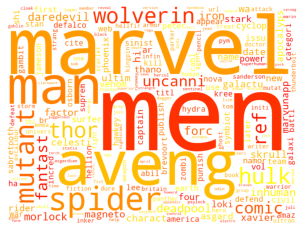

In [99]:
# 
# reate a word-cloud for each universe
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    max_words= 200,
    background_color = 'white',
                      width=800,
                      height=600,
                        collocations=False,
    colormap= 'autumn'
                     ).generate(marvel_str)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#If you'd like, you can remove stopwords/wiki-syntax - I did a bit of that for my own wordclouds.)
# so, (a) stopwords
# (b) wiki-syntax ---> the cleaning thing

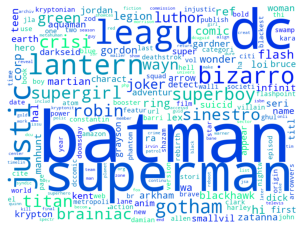

In [100]:
# DC
wordcloud = WordCloud(
    max_words= 200,
    background_color = 'white',
                      width=800,
                      height=600,
                        collocations=False,
    colormap= 'winter'
                     ).generate(dc_str)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# For this and the next exercise, work on the undirected version of the network.

## Exercise 2: Use the concept of modularity to explore how community-like the universes are.
> Explain the concept of modularity in your own words.

**Answer:**  
check this two video if it is hard to understand what is modularity from Sune's vedio.  
https://www.youtube.com/watch?v=Tc7R9oMqLRI  
https://www.youtube.com/watch?v=berZf9Nhr0E  

The formula provides by the second video is a transformed one compared with the original one.

Modularity in my own words: It is a method to measure whether the current split of the whole network brings good community.The formula is showed belos:
$$Q = \sum_i e_{ii} - \sum_i a_i^2$$
where the $$a_i = \sum_j e_{ij}$$

The first part of $Q$ is the fraction within the community, and the second part represents the situation in random version. So we could say that on one hand we try to maximum the ratio of links within community and outside community, on the other hand we try to get far away from the random version.

> Consider the undirected version of the entire network, including both DC and Marvel.

**Answer:**  
get the network from previous stored file.

In [24]:
# as some wiki links contains symbols like ':' and '/' which is not allowed in file name
# then we use a function to replace those symbols when necessary

# get the name for file saving and reading
def file_saving_reading_name(s):
    s = s.replace(':','@')
    s = s.replace('/','$')
    return s

# get the name with ':' and '/'
def node_name(s):
    s = s.replace('@',':')
    s = s.replace('$','/')
    return s

In [25]:
# get the DiGraph which store the relationships of comics characters

# load the nodes and edges from pre-dumped json file
import json
file_path = './data/comics_cha.json'
with open(file_path, 'r') as f:
    data = json.load(f)

In [26]:
import networkx as nx

# bulid the network from data 
G = nx.DiGraph()

# get the attribute from comics_cha
attr_dict = {}
for each in data:
    attr_dict[each] = data[each]['type']

# add nodes    
G.add_nodes_from(data.keys())
# add attribute of type
nx.set_node_attributes(G, attr_dict,'type')


# add links
for each in data:
    for link in data[each]['edges']:
        G.add_edge(each,link)
        
print('number of nodes in network:{}'.format(len(G.nodes())))
print('number of links in network:{}'.format(len(G.edges())))

number of nodes in network:2277
number of links in network:33461


In [27]:
# get the undirected version of the whole network
G_undirect = G.to_undirected()

> Now create your own partition into communities, where all Marvel-characters are one community and all the DC-characters are another community. That's all you need, now calculate the modularity of this partition. Modularity is described in the Network Science book, section 9.4.. Thus, use equation 9.12 in the book to calculate the modularity M of the partition described above. Are the universes good communities?

**Answer:**  
equation 9.12: 
$$M = \sum_{c=1}^{n_c} [\frac{L_c}{L} - {(\frac{k_c}{2L})}^2]$$

In [37]:
# calculate L_marvel and L_dc


# get the sub network of Marvel and DC first

# get the list of DC/Marvel characters
dc_cha = []
marvel_cha = []
for node in G_undirect.nodes():
    if nx.get_node_attributes(G_undirect,'type')[node] == 'Marvel':
        marvel_cha.append(node)
    else:
        dc_cha.append(node)

# get the subgraph from the list
DC_network = G_undirect.subgraph(dc_cha)
Marvel_network = G_undirect.subgraph(marvel_cha)

# L_Marvel = links in Marvel_netwrok; same as DC
L_marvel = len(Marvel_network.edges())
L_dc = len(DC_network.edges())
print('L_marvel={}\tL_dc={}'.format(L_marvel,L_dc))

L_marvel=15850	L_dc=10877


In [38]:
# get the total degree of the nodes in marvel/dc community
k_marvel = sum([v for name,v in G_undirect.degree(marvel_cha)])
k_dc = sum([v for name,v in G_undirect.degree(dc_cha)])
print('k_marvel={}\tk_dc={}'.format(k_marvel,k_dc))

k_marvel=32406	k_dc=22460


In [39]:
# calculate the M 
import math
L = len(G_undirect.edges())
M = L_marvel/L - math.pow((k_marvel/(2*L)),2)  + L_dc/L - math.pow((k_dc/(2*L)),2)
print('M={}'.format(M))

M=0.4578337110873757


**Answer:**  
According to Newman's [paper](https://arxiv.org/pdf/cond-mat/0308217.pdf), the value of Modularity is between 0 to 1, the value near to 1 indicates a strong strcuture of community.  However, in practice, values for such networks typically fall in the range from about 0.3 to 0.7. Higher values are rare. So we could consider the result *0.4578* as a quite good result for a strong community structure. 

> Would you expect this result in light of what we have found in the previous exercises?

**Answer:**  
Of course, especially in those visualization plots.

## Community detection, considering each universe separately.


> Note. For this exercise, it's OK to just pick one of the universes.

Choose Marvel universe here.

In [31]:
# implementation 
!pip install python-louvain

You are using pip version 19.0.3, however version 20.3b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [86]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# compute the best partition
partition = community_louvain.best_partition(Marvel_network)

In [87]:
par_class = set(partition.values())
par_class_dict = {}
for v in partition.values():
    str_v = str(v)
    if str_v not in par_class_dict.keys():
        par_class_dict[str_v] = 1
    else:
        par_class_dict[str_v] += 1
    

In [88]:
partition

{'3-D_Man': 0,
 'A-Next': 1,
 'Abomination_(comics)': 2,
 'Achebe_(comics)': 3,
 'Adam_Warlock': 2,
 'Advanced_Idea_Mechanics': 1,
 'Ajak': 2,
 'Alliance_of_Evil': 4,
 'Alternative_versions_of_Doctor_Strange': 5,
 'Amanda_Sefton': 4,
 'Angel_Salvadore': 4,
 'Ani-Men': 6,
 'Anne_Weying': 6,
 'Arnim_Zola': 1,
 'Asgard_(comics)': 2,
 'Avengers:_The_Initiative': 0,
 'Banshee_(comics)': 4,
 'Baron_Blood': 1,
 'Baron_Brimstone': 6,
 'Baron_Mordo': 2,
 'Baron_Strucker': 1,
 'Baron_Zemo': 1,
 'Barracuda_(Marvel_Comics)': 6,
 'Bastards_of_Evil': 0,
 'Bastion_(comics)': 4,
 'Batroc_the_Leaper': 1,
 'Battlestar_(comics)': 1,
 'Batwing_(Marvel_Comics)': 0,
 'Baymax': 7,
 'Beast_(comics)': 4,
 'Beautiful_Dreamer_(Marvel_Comics)': 4,
 'Bedlam_(comics)': 4,
 'Beetle_(comics)': 6,
 'Belasco_(Marvel_Comics)': 4,
 'Bela_(comics)': 8,
 'Bella_Donna_(comics)': 4,
 'Bengal_(comics)': 0,
 'Bereet': 2,
 'Beta_Ray_Bill': 2,
 'Betsy_Ross_(character)': 1,
 'Betty_Brant': 6,
 'Betty_Ross': 2,
 'Beyonder': 2,
 'B

In [71]:
par_class_dict
# you could see that only the first 8 commuities is meanful for such a huge network

{'0': 48,
 '1': 287,
 '2': 310,
 '3': 1,
 '4': 269,
 '5': 1,
 '6': 252,
 '7': 18,
 '8': 1,
 '9': 1,
 '10': 1,
 '11': 1,
 '12': 1,
 '13': 1,
 '14': 1,
 '15': 1,
 '16': 1,
 '17': 1,
 '18': 1,
 '19': 1,
 '20': 1,
 '21': 1,
 '22': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 1,
 '27': 1,
 '28': 1,
 '29': 1,
 '30': 1,
 '31': 1,
 '32': 1,
 '33': 1,
 '34': 1,
 '35': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1,
 '46': 1,
 '47': 1,
 '48': 1,
 '49': 1,
 '50': 1,
 '51': 1,
 '52': 1,
 '53': 1,
 '54': 1,
 '55': 1,
 '56': 1,
 '57': 1,
 '58': 1,
 '59': 1}

In [80]:

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

d = dict(Marvel_network.degree)


plt.figure(figsize = (30,20))

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.01, #More makes a more sparse graph
                        strongGravityMode=False,
                        gravity=100.0, # increse this, the nodes will be attracted to the center more

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(Marvel_network, pos=None, iterations=2000)


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:48<00:00, 18.51it/s]

BarnesHut Approximation  took  13.94  seconds
Repulsion forces  took  88.94  seconds
Gravitational forces  took  0.37  seconds
Attraction forces  took  0.81  seconds
AdjustSpeedAndApplyForces step  took  1.56  seconds


<Figure size 2160x1440 with 0 Axes>

In [ ]:
# cmap = cm.get_cmap('gist_ncar', 8)
# # print(cmap)
# # nx.draw_networkx(Marvel_network, positions,nodelist=partition.keys(), node_size=[v*5 for v in d.values()],cmap=cmap, node_color =list(partition.values()),alpha = 0.6,\
# #                     edge_color = '#FFB6C1',with_labels=False)

# nx.draw_networkx_nodes(Marvel_network, positions, partition.keys(), node_size=[v*5 for v in d.values()],
#                        cmap=cmap, node_color=list(partition.values()),alpha = 0.5,label = partition.values())
# nx.draw_networkx_edges(Marvel_network, positions, alpha=0.2,edge_color  = '#FFB6C1')
# plt.axis('off')
# plt.show()

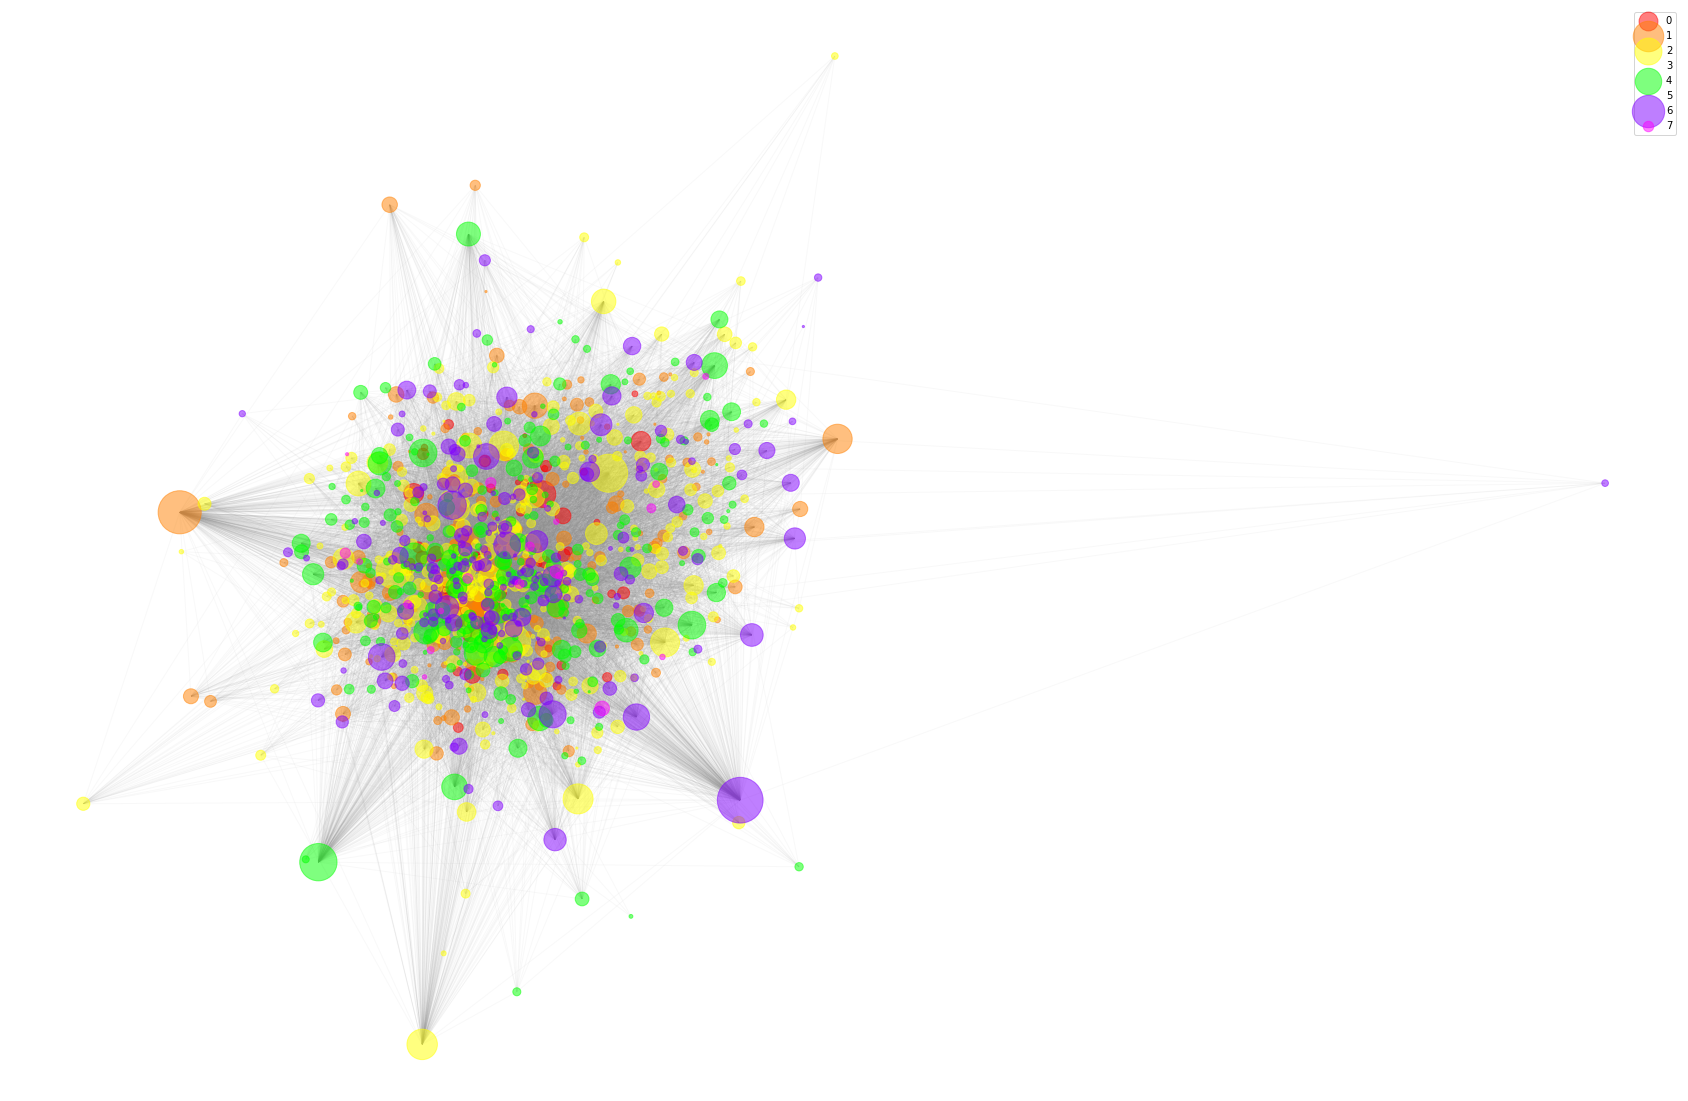

In [94]:
# plot each community
plt.figure(figsize = (30,20))

'''
'0': 48,
 '1': 287,
 '2': 310,
 '3': 1,
 '4': 269,
 '5': 1,
 '6': 252,
 '7': 18,
'''
nx.draw_networkx_edges(Marvel_network,positions, alpha=0.05,edge_color = 'grey')

node_color_list = ['#ff0000','#ff8000','#ffff00','#80ff00',\
                   '#00ff00','#0080ff','#8000ff','#ff00ff']
for i in range(8):
    nodes = [n for n in list(Marvel_network.nodes()) if partition[n] == i]
    d = dict(Marvel_network.degree(nodes))
    nx.draw_networkx_nodes(Marvel_network, positions, d.keys(), node_size=[v*5 for v in d.values()],
                       node_color=node_color_list[i],alpha = 0.5,label =str(i))

plt.legend()   
plt.axis('off')
plt.show()   

# still not good 

> Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the universes as communities? What does this comparison reveal about them?

In [99]:
# calculate the modularity of this partition

import networkx.algorithms.community as nx_comm

# get the representation of communities for  nx_comm.modularity function
communities = {}
for k,v in partition.items():
    str_v = str(v)
    if str_v not in communities.keys():
        communities[str_v] = [k]
    else:
        communities[str_v].append(k)


communities = [v for k,v in communities.items()]
M = nx_comm.modularity(Marvel_network, communities)
print('the modularity of this partition is :{}'.format(M))

the modularity of this partition is :0.36205197384788385


**Answer:**  
It is lower than the above modularity value of the whole network. This result reveals that the partition of Marvel and DC seems to be more valiable than this partition within the marvel universe.

## Exercise 4: Wrap your brain around TF-IDF
> Pick one of the alternative term frequency definitions. Explain why it might sometimes be prefereable to the raw count.

**Answer:**  
For example : Boolean "frequencies"- sometimes we do not care about the frequency times but only the fact that whether this term occur or not. In this situation, boolean frequencies would be better than the raw count.


> What does IDF stand for?

**Answer:**  
Inverse document frequency, which reflects the frequency in the outside corpus. Then, it would diminish the weight of terms that occur very frequently in the document set and increase the weight of terms that occur rarely.

> All of the IDF versions take the log of the calculated weight. Why do you think that is?

**Answer:**  
Make it smoother. To avoid the large bais in term counting.


> Explain why using IDF makes stopword removal less important.

**Answer:**  
Because the stopwords are usually common is every text, therefore the idf item would be low, so the tfidf would decrese the weight.

> In the TR weight that I defined in Exercise 1, we take into account how frequently each word appears inside each of the two documents. Is information of word counts inside each document used in the definition of IDF on Wikipedia?

**Answer:**  
No. (and blabla ...)

> What are the possible weights that a word can have?

**Answer：**  
Only log(2)+1 or log(1)+1. 


> Explain in your own words why TF-IDF might not result in ideal wordclods when you only have two documents.

**Answer:**  
caz you could fully use the information you have in those two document as idf do not use the information of the word counts in each document.